### Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|amount_tsh | Total static head (amount water available to waterpoint)	|
|date_recorded |The date the row was entered	|
|funder |Who funded the well	|
|gps_height |Altitude of the well	|
|installer |Organization that installed the well	|
|longitude |GPS coordinate	|
|latitude |GPS coordinate	|
|wpt_name |Name of the waterpoint if there is one	|
|num_private |	|
|basin |Geographic water basin	|
|subvillage |Geographic location	|
|region |Geographic location	|
|region_code | Geographic location (coded)	|
|district_code |Geographic location (coded)	|
|lga |Geographic location	|
|ward |Geographic location	|
|population |Population around the well	|
|public_meeting |True/False	|
|recorded_by |Group entering this row of data	|
|scheme_management |Who operates the waterpoint	|
|scheme_name |Who operates the waterpoint	|
|permit | If the waterpoint is permitted	|
|construction_year |Year the waterpoint was constructed	|
|extraction_type |The kind of extraction the waterpoint uses	|
|extraction_type_group |The kind of extraction the waterpoint uses	|
|extraction_type_class |The kind of extraction the waterpoint uses	|
|management |How the waterpoint is managed	|
|management_group |How the waterpoint is managed	|
|payment |What the water costs	|
|payment_type |What the water costs	|
|water_quality |The quality of the water	|
|quality_group |The quality of the water	|
|quantity |The quantity of water	|
|quantity_group |The quantity of water	|
|source |The source of the water	|
|source_type |The source of the water	|
|source_class |The source of the water	|
|waterpoint_type |The kind of waterpoint	|
|waterpoint_type_group |The kind of waterpoint	|
|functional |the waterpoint is operational and there are no repairs needed	|
|non functional | the waterpoint is not operational |

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance


%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

from pycaret.classification import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("train5.csv")

In [3]:
df

,amount_tsh,age,population,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_True,scheme_management_None,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_True,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,status_group
0,1000.0,21.0,109.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,25.0,11.0,250.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
2,0.0,34.0,58.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,20.0,11.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0
4,0.0,9.0,345.0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32509,0.0,53.0,210.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
32510,500.0,13.0,89.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
32511,10.0,21.0,125.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
32512,1000.0,24.0,56.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32514 entries, 0 to 32513
Data columns (total 57 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   amount_tsh                                32514 non-null  float64
 1   age                                       32514 non-null  float64
 2   population                                32514 non-null  float64
 3   basin_Lake Nyasa                          32514 non-null  int64  
 4   basin_Lake Rukwa                          32514 non-null  int64  
 5   basin_Lake Tanganyika                     32514 non-null  int64  
 6   basin_Lake Victoria                       32514 non-null  int64  
 7   basin_Pangani                             32514 non-null  int64  
 8   basin_Rufiji                              32514 non-null  int64  
 9   basin_Ruvuma / Southern Coast             32514 non-null  int64  
 10  basin_Wami / Ruvu                 

In [5]:
df.describe(include='all')

,amount_tsh,age,population,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_True,scheme_management_None,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_True,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,status_group
count,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.00000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.00000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000,32514.000000
mean,195.524912,23.270776,217.319893,0.069416,0.029772,0.109399,0.032509,0.258258,0.158086,0.107400,0.136464,0.921388,0.000031,0.008796,0.023897,0.019499,0.002983,0.001938,0.646860,0.074183,0.043981,0.074522,0.072738,0.709756,0.179430,0.037430,0.08015,0.005198,0.126499,0.001538,0.013102,0.024943,0.001569,0.885526,0.201636,0.353663,0.065295,0.008827,0.191364,0.092883,0.004921,0.889801,0.003045,0.082088,0.015163,0.607123,0.25629,0.049302,0.007289,0.278003,0.005567,0.706588,0.000123,0.195577,0.009442,0.086701,0.424463
std,339.119814,12.604989,263.161043,0.254165,0.169960,0.312144,0.177351,0.437683,0.364827,0.309626,0.343286,0.269137,0.005546,0.093376,0.152732,0.138274,0.054539,0.043976,0.477953,0.262073,0.205056,0.262622,0.259710,0.453882,0.383718,0.189816,0.27153,0.071909,0.332416,0.039185,0.113714,0.155954,0.039575,0.318391,0.401228,0.478114,0.247049,0.093538,0.393381,0.290273,0.069978,0.313142,0.055097,0.274503,0.122202,0.488397,0.43659,0.216501,0.085066,0.448022,0.074404,0.455333,0.011091,0.396651,0.096712,0.281401,0.494269
min,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [6]:
df.shape

(32514, 57)

In [7]:
df.columns

Index(['amount_tsh', 'age', 'population', 'basin_Lake Nyasa', 'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu', 'public_meeting_True', 'scheme_management_None', 'scheme_management_Other', 'scheme_management_Parastatal', 'scheme_management_Private operator', 'scheme_management_SWC', 'scheme_management_Trust', 'scheme_management_VWC', 'scheme_management_WUA', 'scheme_management_WUG', 'scheme_management_Water Board', 'scheme_management_Water authority', 'permit_True', 'extraction_type_class_handpump', 'extraction_type_class_motorpump', 'extraction_type_class_other', 'extraction_type_class_rope pump', 'extraction_type_class_submersible', 'extraction_type_class_wind-powered', 'management_group_other', 'management_group_parastatal', 'management_group_unknown', 'management_group_user-group', 'payment_type_monthly', 'payment_type_never pay', 'payment_type_on failure', 'payment_type_other',


In [8]:
df2 = df.sample(frac=0.33, random_state=0)

In [9]:
df2

,amount_tsh,age,population,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_True,scheme_management_None,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_True,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,status_group
16795,0.0,42.0,210.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
18694,20.0,45.0,150.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
74,0.0,12.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
14199,6.0,12.0,40.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5192,0.0,46.0,230.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,0.0,44.0,1000.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
724,0.0,14.0,1.0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
18824,100.0,46.0,50.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
15234,500.0,12.0,125.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


### Univariate Data Exploration

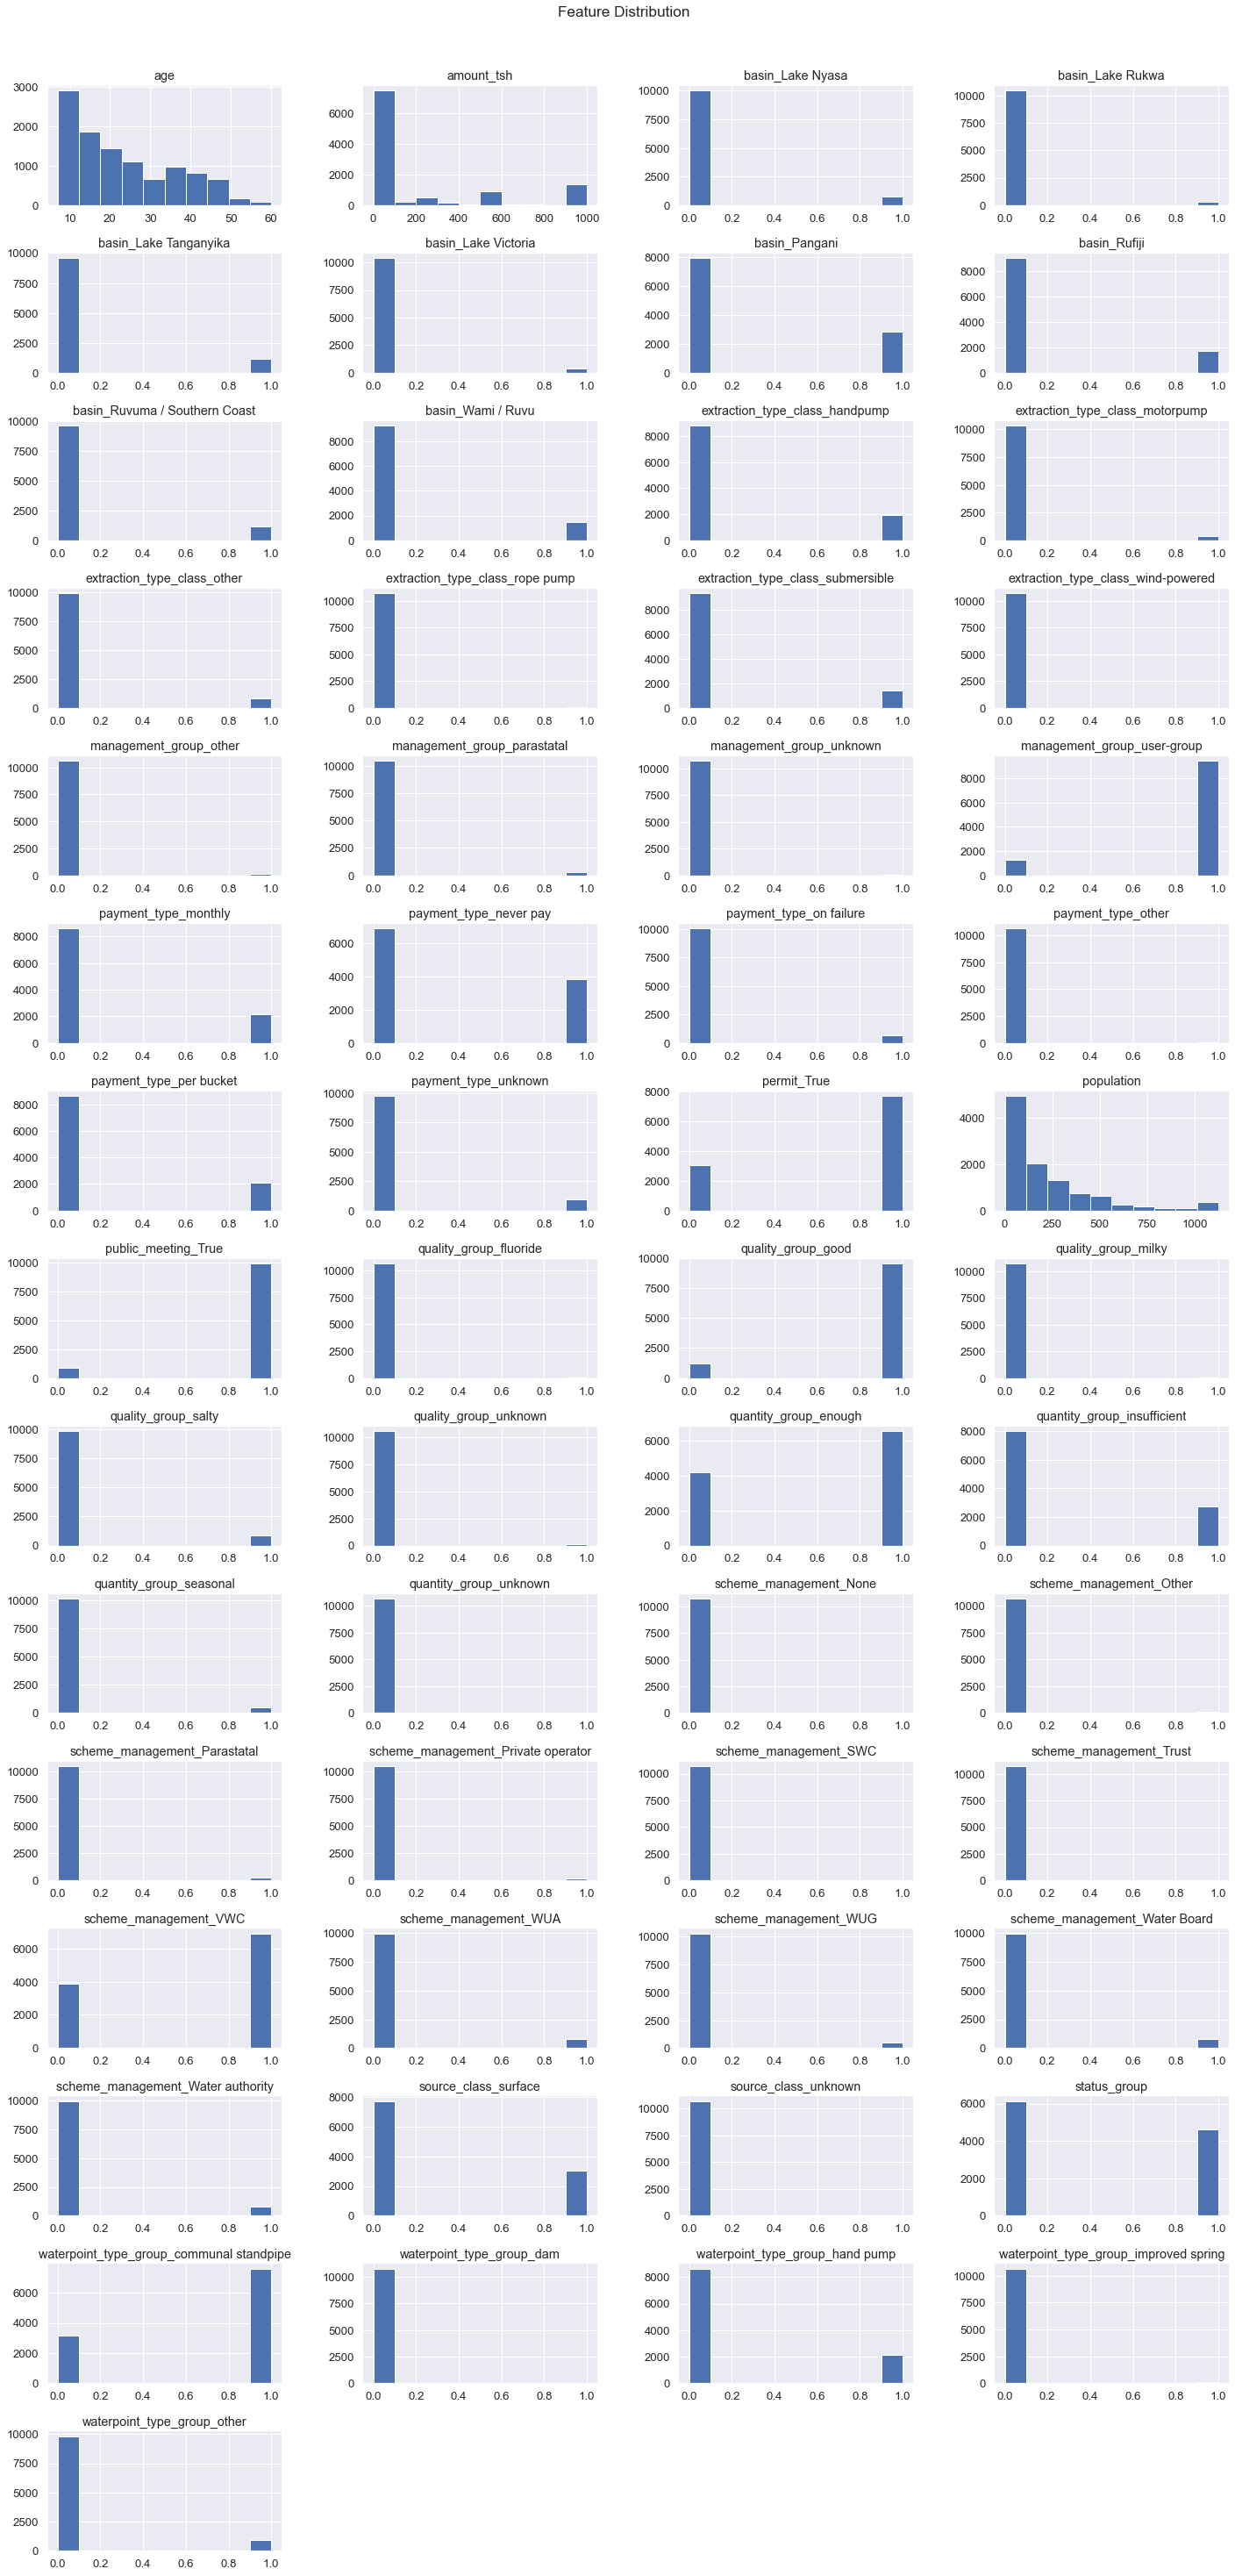

In [10]:
df2.hist(bins=10, figsize=(20,40), layout=(15,4))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

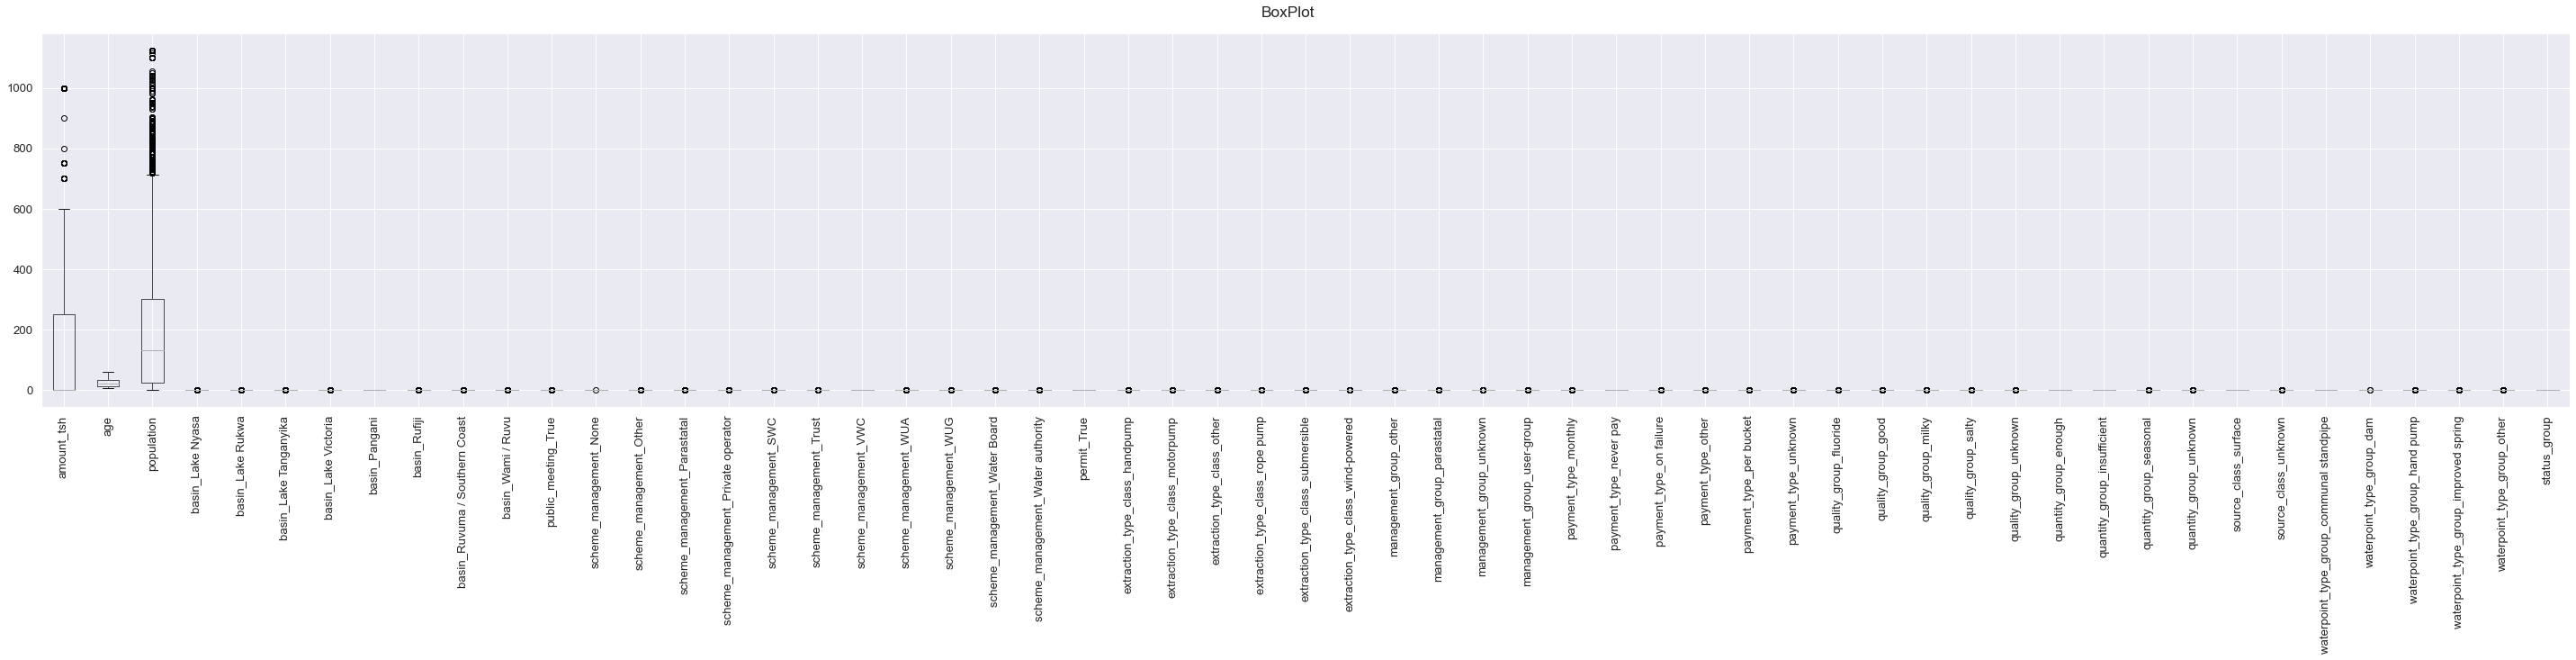

In [11]:
df2.boxplot(figsize=(40,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Correlation

In [12]:
df2.corr()

,amount_tsh,age,population,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_True,scheme_management_None,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_True,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,status_group
amount_tsh,1.000000,-0.016450,-0.033855,0.163154,0.093115,0.039632,-0.059909,-0.176620,0.242861,-0.044085,-0.097949,0.116436,-0.004192,-0.024307,-0.021443,-0.038410,-0.030380,-0.027342,0.026805,0.051613,0.023965,-0.069944,0.049560,0.041129,0.071596,-0.061672,-0.095797,0.021750,-0.126437,-0.013543,-0.038207,-0.043418,0.002011,0.114970,0.328350,-0.425103,0.071332,0.025806,-0.230061,-0.181997,-0.011861,0.065705,-0.017347,-0.064252,-0.013212,0.118638,-0.071193,-0.041760,-0.010277,0.021076,-0.033728,0.025376,-0.007927,0.068554,-0.044370,-0.121007,-0.174777
age,-0.016450,1.000000,-0.002321,-0.047128,0.074633,0.020064,0.020776,0.068027,-0.008958,0.048623,-0.053962,-0.053931,-0.002575,0.020477,-0.099050,-0.071215,-0.009143,-0.010308,0.125763,-0.012685,-0.072755,-0.051095,-0.010036,0.059574,-0.111498,-0.003393,0.090836,-0.066432,-0.054087,0.002174,0.000930,-0.087344,0.010604,0.105063,-0.019537,0.163071,0.005407,0.009062,-0.173024,-0.010986,-0.021785,0.005012,0.000787,-0.010401,0.035062,-0.118047,0.049154,-0.031161,0.012003,0.040872,-0.012636,-0.003521,-0.009544,-0.106781,-0.045144,0.171234,0.284820
population,-0.033855,-0.002321,1.000000,-0.111219,0.058451,0.219285,0.138466,-0.168682,-0.097431,0.017064,0.015588,0.023203,-0.006478,0.088891,0.046185,0.017208,-0.030707,-0.005215,-0.006113,-0.078618,0.089715,-0.105262,0.138668,-0.110716,0.163674,-0.018550,0.041309,-0.025256,0.062762,0.047233,0.055398,0.072029,0.001449,0.026802,-0.058230,0.031427,-0.015345,-0.013111,0.027779,0.045567,-0.002976,-0.078424,0.011571,0.094858,-0.016766,-0.083319,0.070499,0.061048,0.005407,0.063540,-0.011172,-0.136688,0.025503,0.148485,0.033462,-0.004099,0.036959
basin_Lake Nyasa,0.163154,-0.047128,-0.111219,1.000000,-0.046696,-0.093880,-0.049686,-0.161352,-0.117580,-0.092470,-0.107967,0.026571,-0.002601,0.019218,-0.019714,-0.035775,-0.015630,-0.013018,0.129709,-0.018376,-0.005312,-0.075834,-0.076669,-0.196162,-0.057619,-0.053763,-0.056658,-0.008944,-0.087928,-0.010079,0.006964,-0.029708,-0.000148,0.076249,0.039612,-0.054176,0.121208,-0.014921,-0.126509,-0.076130,-0.020537,0.065434,-0.014024,-0.078071,0.028383,0.059363,-0.098263,-0.011514,-0.009738,-0.071528,-0.020201,0.105126,-0.003678,-0.067151,-0.025052,-0.065670,-0.123665
basin_Lake Rukwa,0.093115,0.074633,0.058451,-0.046696,1.000000,-0.060408,-0.031971,-0.103823,-0.075657,-0.059500,-0.069472,-0.041678,-0.001673,-0.004107,-0.024373,-0.024728,-0.010057,0.014596,0.089344,-0.049134,-0.037183,-0.049697,0.013771,-0.026971,0.129272,-0.031709,0.035754,-0.012442,-0.063257,-0.006486,-0.009297,-0.014172,0.008337,-0.006256,-0.069718,0.053603,-0.017103,-0.015118,-0.062616,-0.047094,-0.013215,-0.048332

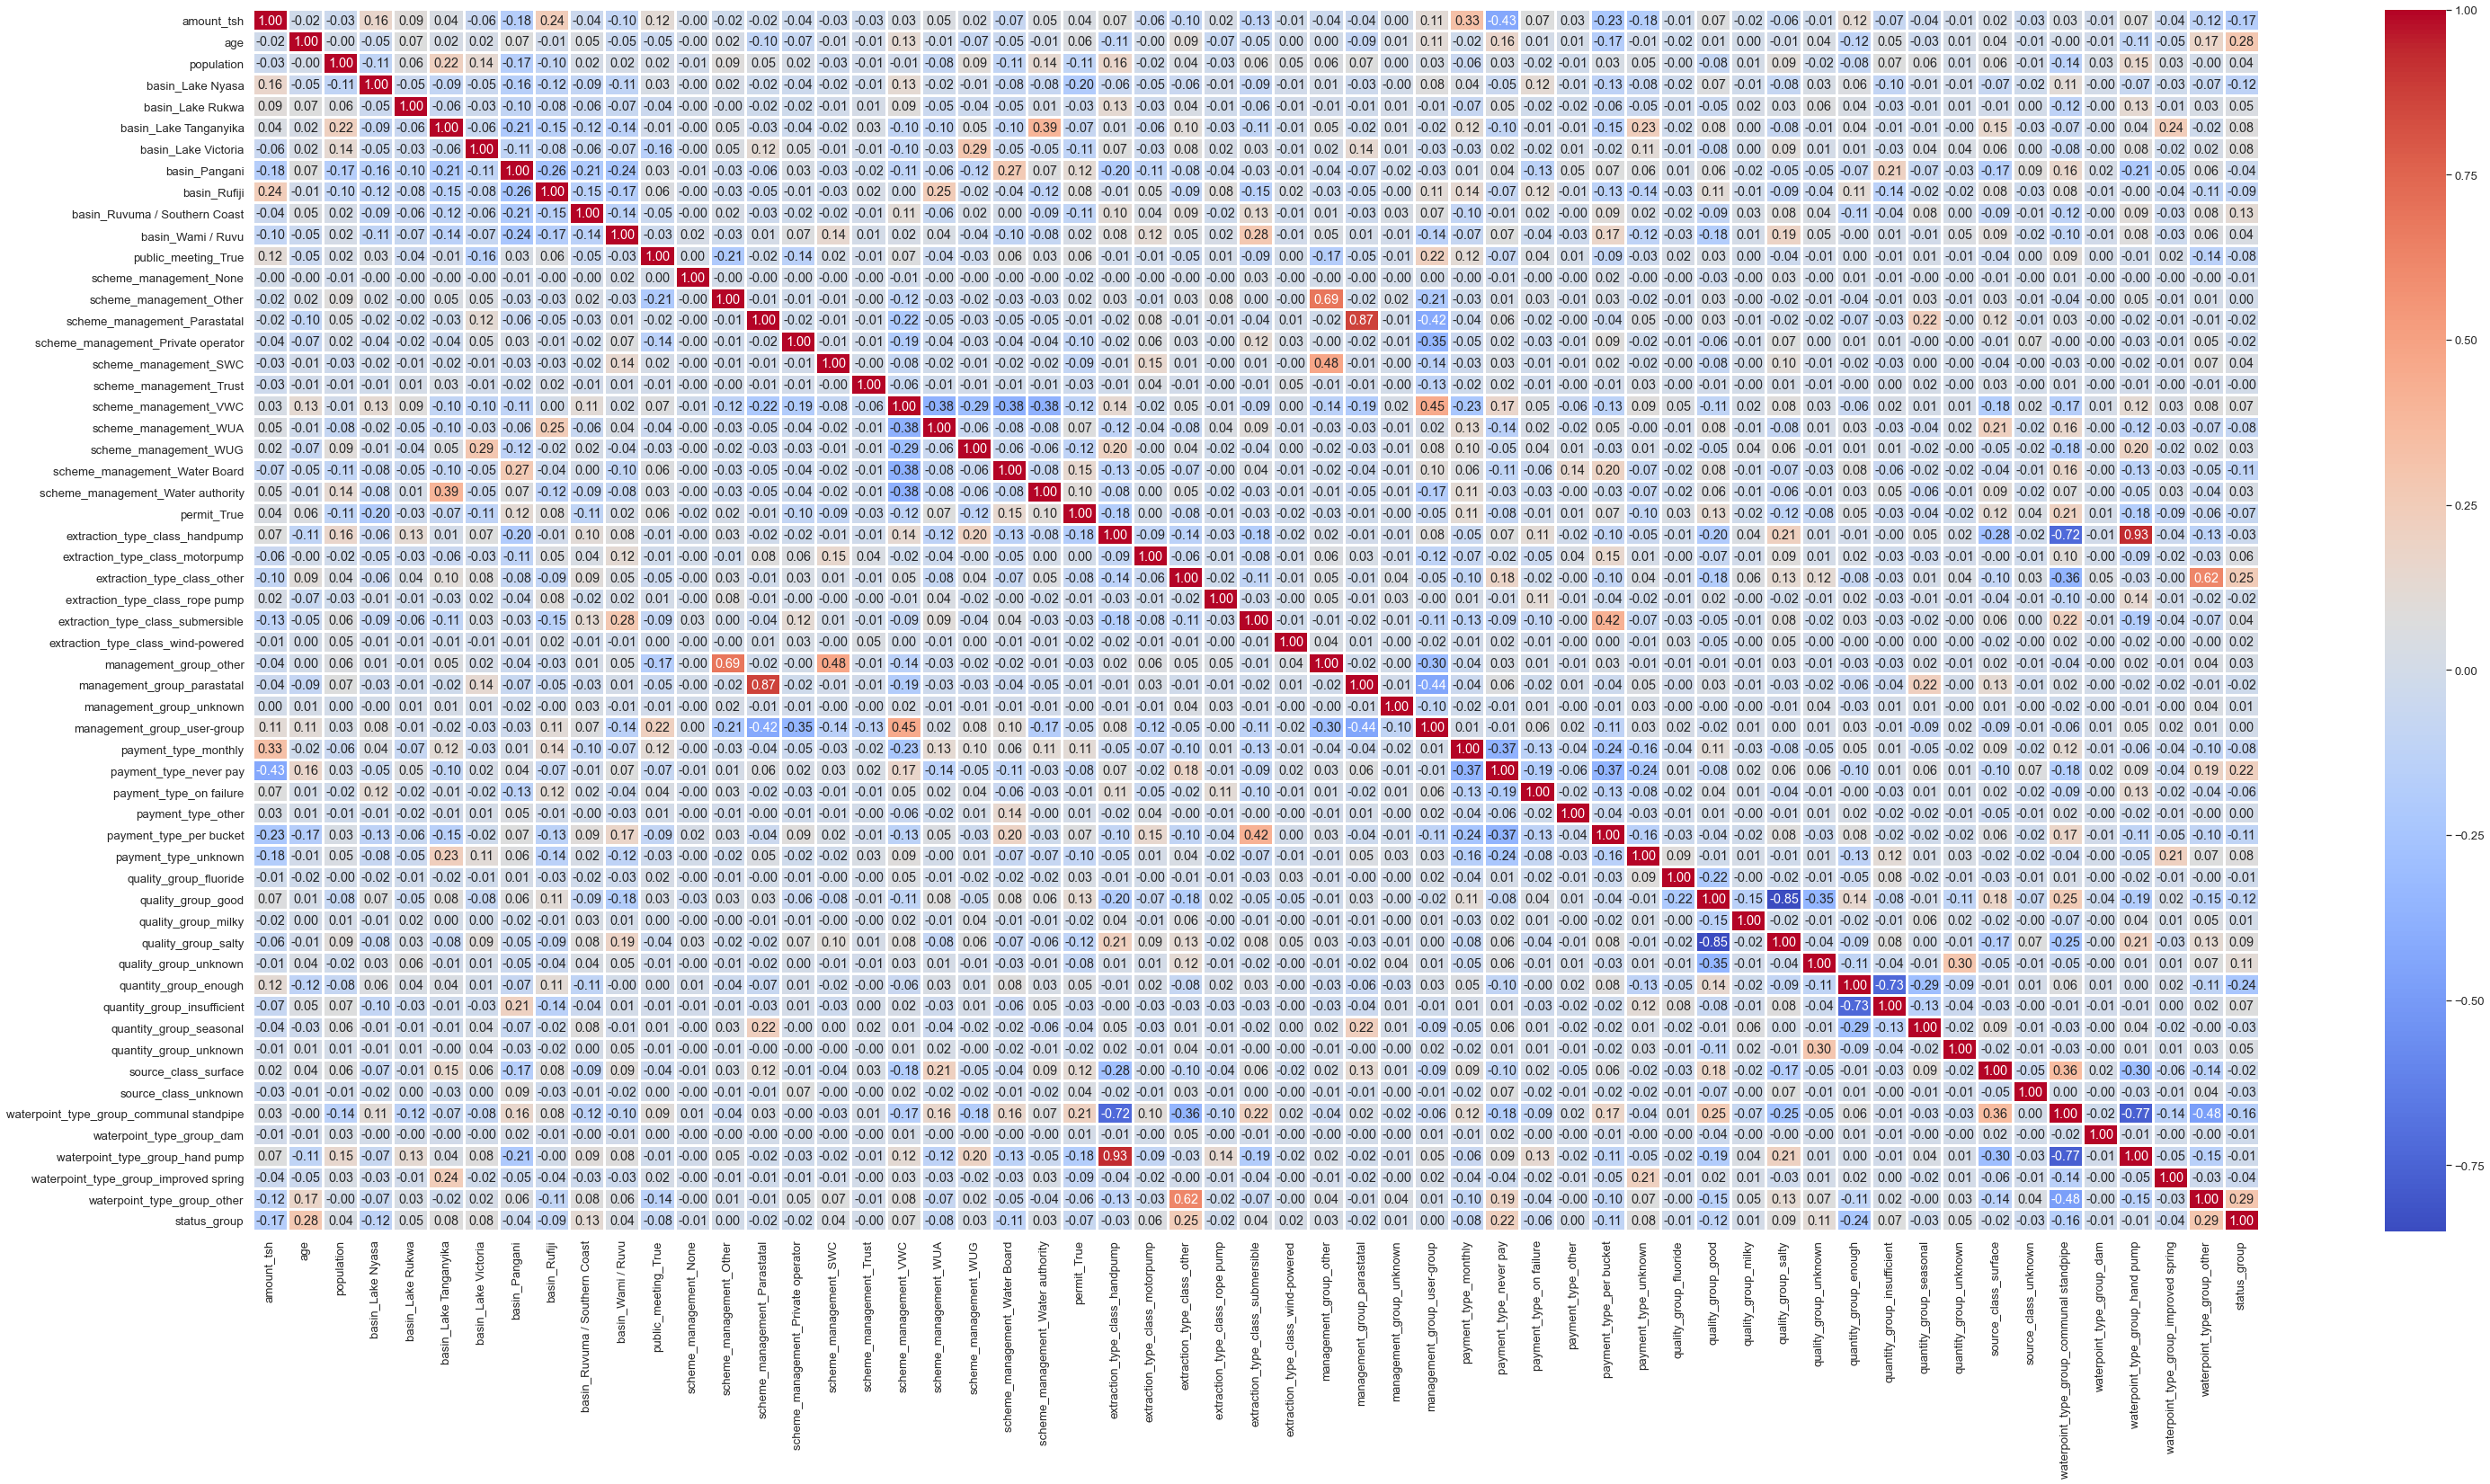

In [13]:
plt.figure(figsize=(50,25))
sns.heatmap(df2.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

In [14]:
df2.shape

(10730, 57)

In [15]:
X = df2.iloc[:,0:56]
y = df2.iloc[:,56]

### Treat Imbalance Data

In [16]:
y.value_counts()

0    6119
1    4611
Name: status_group, dtype: int64

In [ ]:
ros = RandomOverSampler(sampling_strategy='all',random_state=0)

In [ ]:
new_X, new_y = ros.fit_resample(X, y)

In [ ]:
new_y[].value_counts()

In [ ]:
new_X

### Train Test Split

In [17]:
X.values, y.values

(array([[  0.,  42., 210., ...,   0.,   0.,   0.],
        [ 20.,  45., 150., ...,   0.,   0.,   0.],
        [  0.,  12.,   1., ...,   0.,   0.,   0.],
        ...,
        [100.,  46.,  50., ...,   0.,   0.,   0.],
        [500.,  12., 125., ...,   0.,   0.,   0.],
        [ 30.,  21.,  80., ...,   0.,   0.,   0.]]),
 array([0, 1, 0, ..., 1, 0, 0], dtype=int64))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8584, 56), (2146, 56), (8584,), (2146,))

### Feature Scaling

In [20]:
X_train

,amount_tsh,age,population,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_True,scheme_management_None,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,permit_True,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_other,payment_type_per bucket,payment_type_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
13157,0.0,46.0,200.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
14683,200.0,24.0,250.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
217,20.0,16.0,250.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
31591,250.0,32.0,340.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
29163,500.0,35.0,543.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17757,10.0,21.0,36.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0.0,9.0,345.0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
6525,1000.0,18.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
30263,0.0,18.0,582.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [21]:
minmax = MinMaxScaler()

In [22]:
X_train_scaled = minmax.fit_transform(X_train)

In [23]:
X_test_scaled = minmax.transform(X_test)

In [24]:
X_train_scaled

array([[0.        , 0.73584906, 0.17777778, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.32075472, 0.22222222, ..., 0.        , 0.        ,
        1.        ],
       [0.02      , 0.16981132, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.20754717, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.20754717, 0.51733333, ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.50943396, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
X_test_scaled

array([[3.00000000e-01, 3.77358491e-02, 3.11111111e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 7.54716981e-02, 1.11111111e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e-02, 5.84905660e-01, 1.77777778e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.88679245e-02, 8.88888889e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 7.54716981e-01, 5.33333333e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.84905660e-01, 1.06666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### Model Training

### Using PyCaret for checking best models

In [26]:
exp = setup(data = df, target = 'status_group', session_id=0, normalize=True, train_size=0.8,normalize_method='minmax') 

Setup Succesfully Completed!


,Description,Value
0,session_id,0
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(32514, 57)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,53
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [27]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7818,0.8572,0.6512,0.7984,0.7164,0.5422,0.5503,8.0953
1,Light Gradient Boosting Machine,0.7772,0.8518,0.6562,0.7849,0.7136,0.5338,0.5405,0.2648
2,Extreme Gradient Boosting,0.7764,0.8481,0.6739,0.7716,0.7187,0.5347,0.5387,1.6120
3,Random Forest Classifier,0.7683,0.8348,0.6698,0.7570,0.7103,0.5185,0.5217,0.0680
4,Gradient Boosting Classifier,0.7666,0.8399,0.6200,0.7862,0.6926,0.5087,0.5186,1.2362
5,Extra Trees Classifier,0.7654,0.8319,0.7024,0.7343,0.7175,0.5172,0.5181,0.4867
6,Logistic Regression,0.7508,0.8248,0.5955,0.7665,0.6697,0.4747,0.4849,0.1489
7,Ada Boost Classifier,0.7489,0.8218,0.6114,0.7526,0.6737,0.4732,0.4808,0.5583
8,Ridge Classifier,0.7481,0.0000,0.5674,0.7802,0.6563,0.4654,0.4805,0.0353
9,Linear Discriminant Analysis,0.7464,0.8214,0.5674,0.7757,0.6546,0.4620,0.4766,0.1180


### Choose XGBoost since it has highest F1 score due to imbalance status_groups but at the expense of time

### Using XGBoost (Scikit-Learn)

### Using RandomSearchCV

In [28]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [29]:
parameters = {'max_depth': np.arange(3,10,1),
              'eta': np.arange(0.05,0.3,0.05),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,10,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1),
              'reg_alpha':np.arange(0,1,0.1),
              'reg_lambda':np.arange(0,1,0.1)
             }

In [30]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 10, 
                           n_jobs=-1, scoring='f1')

In [31]:
randm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                        'min_child_weight': array([1, 2, 3]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800,

In [32]:
randm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7999999999999999,
              eta=0.15000000000000002, gamma=4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.150000006, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.0,
              reg_lambda=0.9, scale_pos_weight=1, subsample=0.7999999999999999,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
randm.best_score_

0.7388765196873353

In [34]:
randm.best_params_

{'subsample': 0.7999999999999999,
 'reg_lambda': 0.9,
 'reg_alpha': 0.0,
 'n_estimators': 600,
 'min_child_weight': 3,
 'max_depth': 9,
 'gamma': 4,
 'eta': 0.15000000000000002,
 'colsample_bytree': 0.7999999999999999}

### Final Model

In [35]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=600, objective='binary:logistic',
        subsample=0.8,reg_lambda=0.9,reg_alpha=0.0,min_child_weight=3,max_depth=9,gamma=4,
                       eta=0.15,colsample_bytree=0.8)

In [36]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='error',early_stopping_rounds=10)

[0]	validation_0-error:0.29916
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.27726
[2]	validation_0-error:0.26049
[3]	validation_0-error:0.25629
[4]	validation_0-error:0.24790
[5]	validation_0-error:0.25303
[6]	validation_0-error:0.24138
[7]	validation_0-error:0.23625
[8]	validation_0-error:0.23113
[9]	validation_0-error:0.23346
[10]	validation_0-error:0.23299
[11]	validation_0-error:0.23253
[12]	validation_0-error:0.23159
[13]	validation_0-error:0.23113
[14]	validation_0-error:0.22973
[15]	validation_0-error:0.23020
[16]	validation_0-error:0.23066
[17]	validation_0-error:0.23066
[18]	validation_0-error:0.22693
[19]	validation_0-error:0.22414
[20]	validation_0-error:0.22414
[21]	validation_0-error:0.22693
[22]	validation_0-error:0.22740
[23]	validation_0-error:0.22787
[24]	validation_0-error:0.22787
[25]	validation_0-error:0.22693
[26]	validation_0-error:0.22554
[27]	validation_0-error:0.22647
[28]	validation_0-error:0.22507
[29]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.15, gamma=4,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.150000006, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.0,
              reg_lambda=0.9, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
y_pred = xgbmodel.predict(X_test_scaled)

In [38]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Model Evaluation

In [39]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1059,  154],
       [ 327,  606]], dtype=int64)

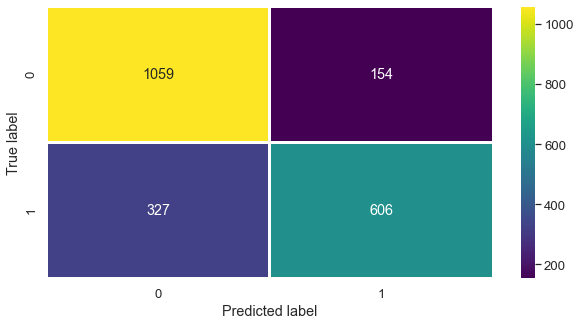

In [40]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1213
           1       0.80      0.65      0.72       933

    accuracy                           0.78      2146
   macro avg       0.78      0.76      0.77      2146
weighted avg       0.78      0.78      0.77      2146



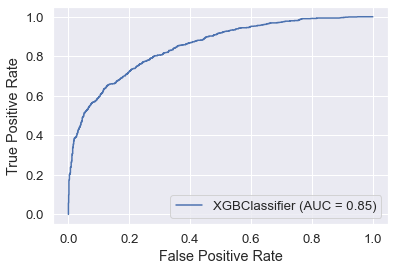

In [43]:
plot_roc_curve(xgbmodel,X_test_scaled,y_test)
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [44]:
X.columns

Index(['amount_tsh', 'age', 'population', 'basin_Lake Nyasa', 'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu', 'public_meeting_True', 'scheme_management_None', 'scheme_management_Other', 'scheme_management_Parastatal', 'scheme_management_Private operator', 'scheme_management_SWC', 'scheme_management_Trust', 'scheme_management_VWC', 'scheme_management_WUA', 'scheme_management_WUG', 'scheme_management_Water Board', 'scheme_management_Water authority', 'permit_True', 'extraction_type_class_handpump', 'extraction_type_class_motorpump', 'extraction_type_class_other', 'extraction_type_class_rope pump', 'extraction_type_class_submersible', 'extraction_type_class_wind-powered', 'management_group_other', 'management_group_parastatal', 'management_group_unknown', 'management_group_user-group', 'payment_type_monthly', 'payment_type_never pay', 'payment_type_on failure', 'payment_type_other',


In [45]:
xgbmodel.get_booster().feature_names = ['amount_tsh', 'age', 'population', 'basin_Lake Nyasa', 'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu', 'public_meeting_True', 'scheme_management_None', 'scheme_management_Other', 'scheme_management_Parastatal', 'scheme_management_Private operator', 'scheme_management_SWC', 'scheme_management_Trust', 'scheme_management_VWC', 'scheme_management_WUA', 'scheme_management_WUG', 'scheme_management_Water Board', 'scheme_management_Water authority', 'permit_True', 'extraction_type_class_handpump', 'extraction_type_class_motorpump', 'extraction_type_class_other', 'extraction_type_class_rope pump', 'extraction_type_class_submersible', 'extraction_type_class_wind-powered', 'management_group_other', 'management_group_parastatal', 'management_group_unknown', 'management_group_user-group', 'payment_type_monthly', 'payment_type_never pay', 'payment_type_on failure', 'payment_type_other',
       'payment_type_per bucket', 'payment_type_unknown', 'quality_group_fluoride', 'quality_group_good', 'quality_group_milky', 'quality_group_salty', 'quality_group_unknown', 'quantity_group_enough', 'quantity_group_insufficient', 'quantity_group_seasonal', 'quantity_group_unknown', 'source_class_surface', 'source_class_unknown', 'waterpoint_type_group_communal standpipe', 'waterpoint_type_group_dam', 'waterpoint_type_group_hand pump', 'waterpoint_type_group_improved spring', 'waterpoint_type_group_other']

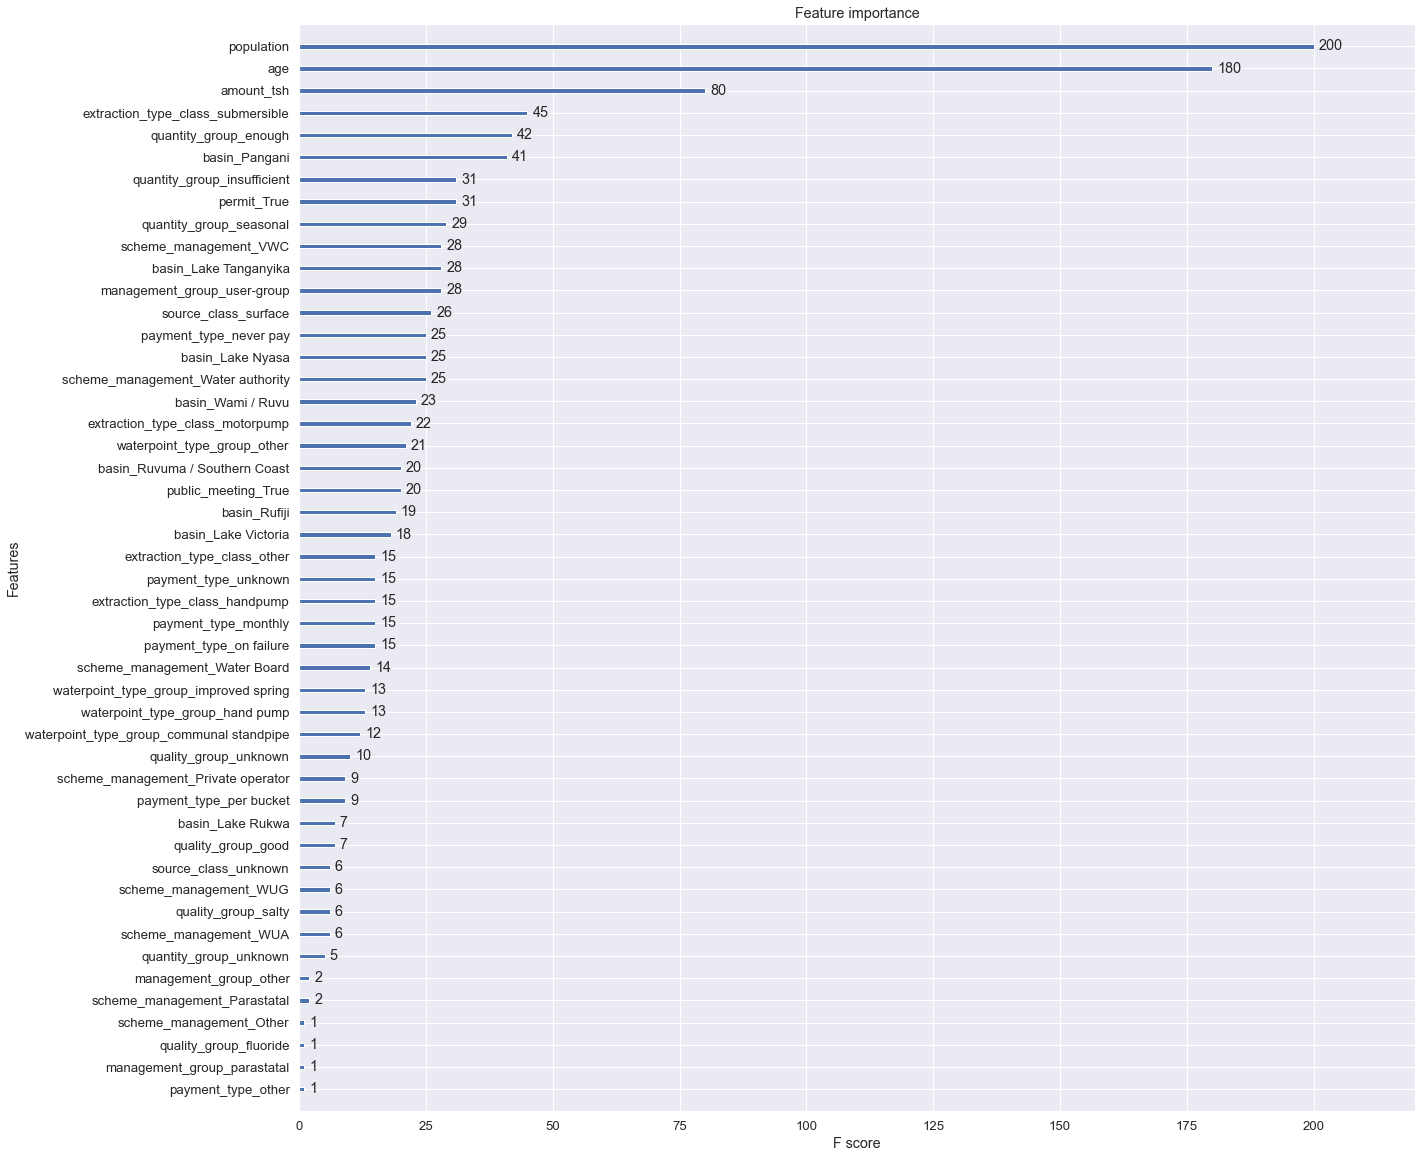

In [46]:
fig, ax = plt.subplots(figsize=(20,20))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

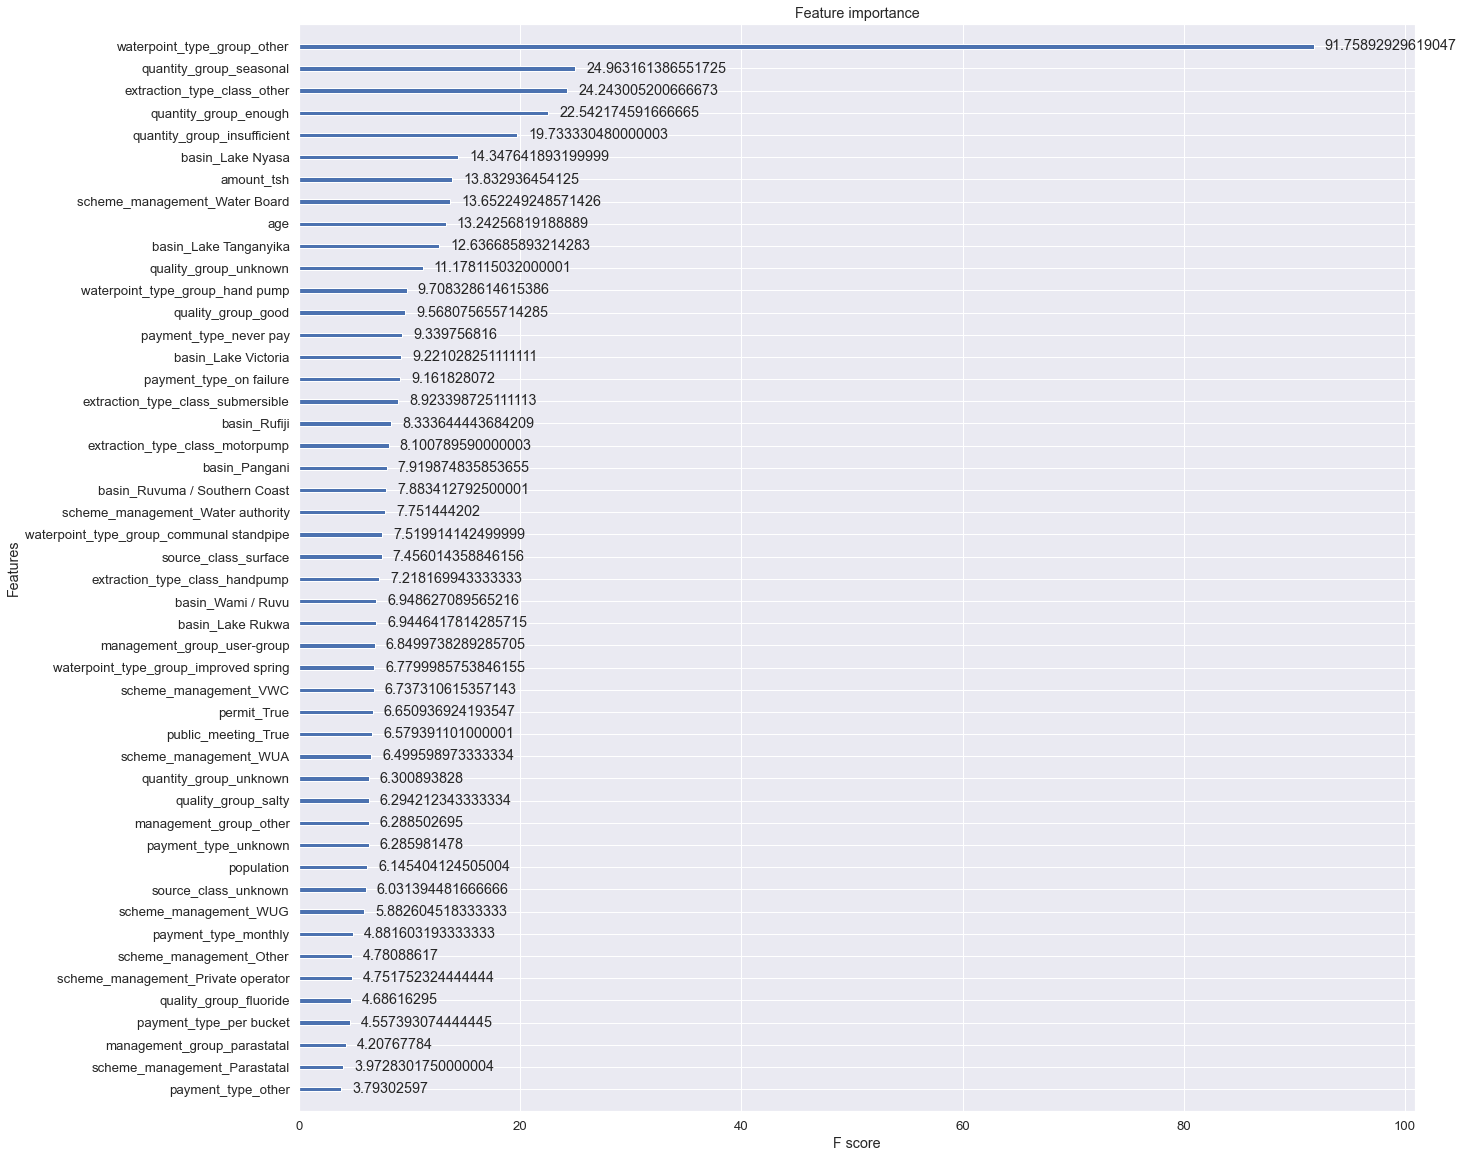

In [47]:
fig, ax = plt.subplots(figsize=(20,20))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax, importance_type='gain')
plt.show()

### Cross-Validation

In [48]:
cv = cross_val_score(xgbmodel,X.values,y.values,cv=5,verbose=1,scoring='f1')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   58.7s finished


In [49]:
cv.mean()

0.742061220344653

### Save the Model

In [50]:
filename = 'pumpmodel.sav'
dump(xgbmodel,open(filename,'wb'))